# Supervised learning solutions to predict number of alarms
#### Camilo Gómez - Rafael Barrera

In this notebook we create an approach to predict the number of alarms that will go off in any month by treating the problem as a supervised learning problem of the regression type. For this we use different models to test the accuracy of each one.

### Create dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
alarms = pd.read_csv("CPT_PREDICTIVE_PPM.csv", encoding='cp1252')
alarms["Date Created"] = pd.to_datetime(alarms["Date Created"], dayfirst=True)
unique_stores = alarms["Site Number"].unique()
alarms = alarms.set_index("Date Created")

C:\Users\Camilo\AppData\Local\Temp\ipykernel_22680\4105414769.py:1: DtypeWarning: Columns (9,12,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  alarms = pd.read_csv("CPT_PREDICTIVE_PPM.csv", encoding='cp1252')


Text(0.5, 1.0, 'Total amount of alarms each month')

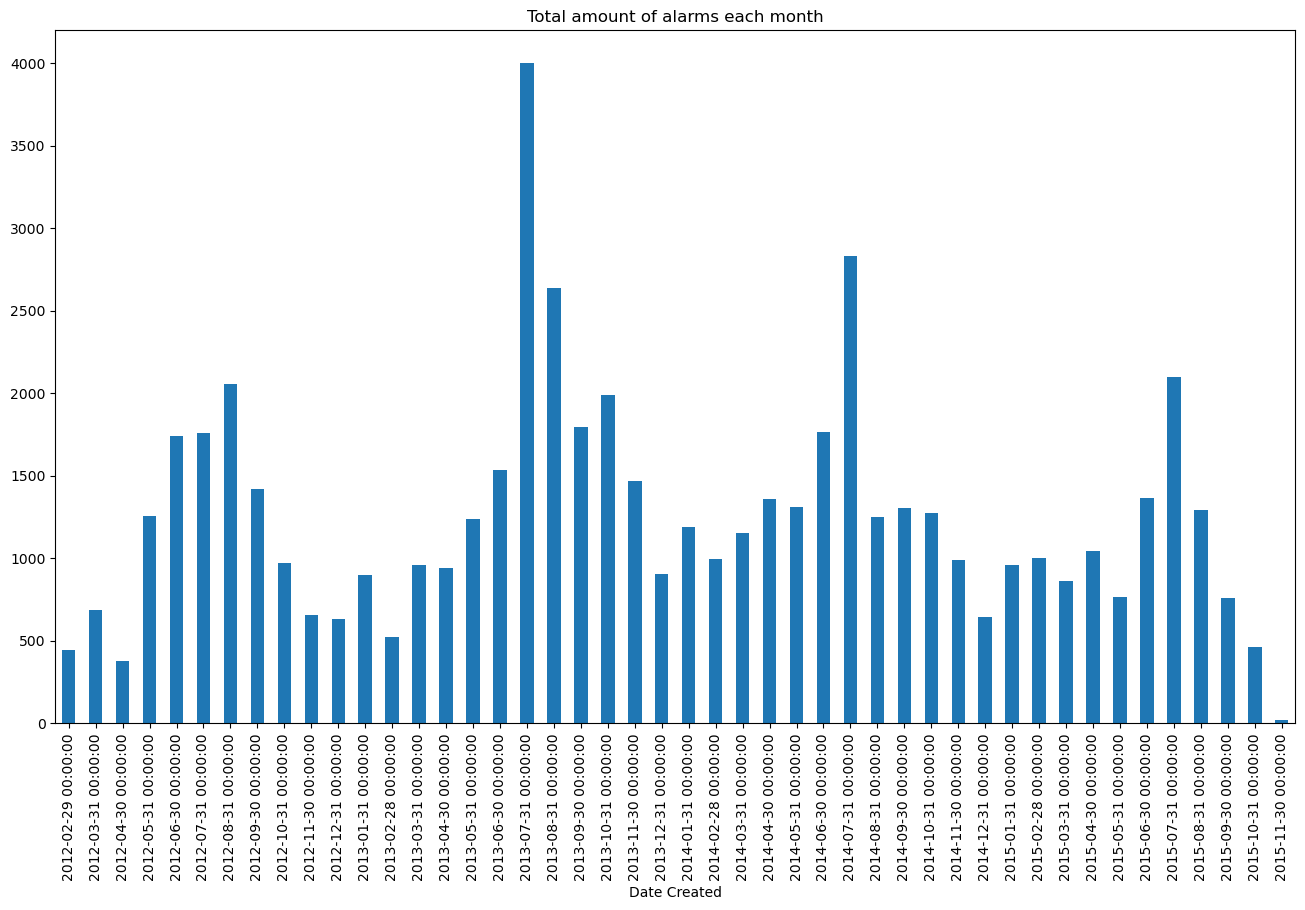

In [3]:
plt.figure(figsize=(16,9))
alarms[alarms["Sales Sq. Ft."] < 10000].resample("M").size().plot.bar()
plt.title("Total amount of alarms each month")

Now we rearange the data into a new DataFrame, where the rows will be the months and columns will be each store, and the cells will be the amount of alarms that happened in that store in that month, and we also remove the stores that don't have at least half of the values different than NaNs in the entire range of dates:

In [6]:
dataset = pd.DataFrame(
    index=alarms.resample("M").size().index,
    columns=unique_stores
)

In [7]:
for store in unique_stores:
    dataset[store] = alarms[alarms["Site Number"] == store].resample("M").size()

dataset_cleaner = dataset.dropna(thresh=len(dataset.index)//2, axis=1)
dataset_cleaner.index = dataset_cleaner.index.strftime('%Y-%m')

In [8]:
dataset_cleaner

,A0892,A0416,A0003,A0683,A0052,A2130,A0017,A0507,A2047,A0038,...,P2081,P2231,P2077,D0470,D0187,D0440,A4629,A2121,D0147,D0450
Date Created,,,,,,,,,,,,,,,,,,,,,
2012-02,17.0,3.0,12.0,19.0,43,5.0,55,16.0,14.0,19.0,...,1.0,NaN,NaN,33.0,33.0,24.0,1.0,NaN,NaN,NaN
2012-03,5.0,6.0,0.0,15.0,51,7.0,18,12.0,8.0,36.0,...,0.0,NaN,NaN,36.0,36.0,26.0,0.0,3.0,NaN,NaN
2012-04,8.0,12.0,10.0,16.0,20,8.0,15,18.0,6.0,20.0,...,0.0,NaN,NaN,34.0,34.0,26.0,0.0,1.0,NaN,NaN
2012-05,16.0,17.0,18.0,37.0,24,5.0,49,7.0,20.0,36.0,...,0.0,NaN,NaN,35.0,36.0,28.0,0.0,0.0,NaN,NaN
2012-06,25.0,6.0,29.0,7.0,32,4.0,32,9.0,16.0,11.0,...,0.0,NaN,NaN,42.0,42.0,42.0,0.0,5.0,NaN,NaN
2012-07,9.0,7.0,39.0,9.0,55,3.0,45,15.0,9.0,15.0,...,0.0,NaN,NaN,35.0,35.0,31.0,0.0,0.0,NaN,NaN
2012-08,19.0,9.0,27.0,12.0,58,6.0,116,50.0,10.0,19.0,...,0.0,NaN,NaN,35.0,35.0,31.0,0.0,0.0,NaN,NaN
2012-09,2.0,8.0,16.0,9.0,24,9.0,24,5.0,7.0,15.0,...,0.0,NaN,NaN,35.0,35.0,30.0,1.0,0.0,NaN,NaN
2012-10,5.0,9.0,67.0,20.0,16,12.0,20,13.0,6.0,40.0,...,0.0,NaN,NaN,35.0,35.0,31.0,0.0,0.0,NaN,NaN


And the next step is to use the dataset to create the proper training dataset for each store. This consist in reframing the problem as a time series problem, where where the amount of alarms in a month is the target to aim for, and the input data is the alarms before that with some lags. For instance, we can use a one year lag and six months lag. This means that to predict the value of July 2013 we'll use as input the values of these months: [July 2012, January 2013, February 2013, March 2013, April 2013, May 2013, June 2013]
The first of those is the one-year lag and the other six are the six-month lags. This creates an X and y array for every store:

In [9]:
years_lag = 1
months_lag = 11

In [10]:
def create_X_and_y_from_lags_per_store(dataset, years_lag=1, months_lag=6):
    max_lag = max((years_lag*12, months_lag))
    stores_lags = {}
    X = []
    y = []
    for store in dataset.columns:
        stores_lags[store] = {"X": [], "y": []}
        store_good_data = dataset[store].dropna()
        store_months = store_good_data.index
        if len(store_months) > max_lag + 1:
            for i, interval_start in enumerate(store_months):
                if i >= max_lag:
                    X_store_interval_years_vals = list(store_good_data.iloc[i-years_lag*12:i:12])
                    X_store_interval_months_vals = list(store_good_data.iloc[i-months_lag:i])
                    X_store_interval = X_store_interval_years_vals + X_store_interval_months_vals
                    y_store_interval = [store_good_data.iloc[i]]
                    stores_lags[store]["X"].append(X_store_interval)
                    stores_lags[store]["y"].append(y_store_interval)
    
    return stores_lags

In [ ]:
stores_data = create_X_and_y_from_lags_per_store(dataset_cleaner, years_lag=1, months_lag=11)

Now we also want to use an extra variable, which will give extra information to the models about each store. This variable is the Site Type, of which there are five possible categories, and it will be encoded in the input vector as a one-hot vector after the lags:

In [ ]:
for store in stores_data:
    store_first_row = alarms[alarms["Site Number"] == store].iloc[0]
    stores_data[store]["type"] = store_first_row["Site Type"]

In [ ]:
unique_types = list(set(stores_data[store]["type"] for store in stores_data))

for store in stores_data:
    store_type_vector = [0]*len(unique_types)
    store_type_vector[unique_types.index(stores_data[store]["type"])] = 1.
    for i in range(len(stores_data[store]["X"])):
        stores_data[store]["X"][i] += store_type_vector

Now the X and y values of all stores will be combined into a single dataset with a MinMaxScaler, and a train-test split:

In [ ]:
X = []
y = []

for store in stores_data:
    X += stores_data[store]["X"]
    y += stores_data[store]["y"]

In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_X.fit(X)
scaler_y.fit(y)

scaled_X = scaler_X.transform(X)
scaled_y = scaler_y.transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, scaled_y, test_size=0.1, random_state=42
)

### Create models

Having the dataset, the next step is to implement the different models. These will be:
- Random Forest Regressor
- Support Vector Machine Regressor
- Stochastic Gradient Descent Regressor
- Neural Network in TensorFlow

For each one of these the model will be created and fitted:

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
import tensorflow as tf

Random Forest Regressor:

In [50]:
model_rf = RandomForestRegressor(n_estimators=1000)
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=1000)

Support Vector Machine Regressor:

In [51]:

model_svm = svm.SVR()
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Stochastic Gradient Descent Regressor:

In [52]:
model_sgd = SGDRegressor(max_iter=1000, tol=1e-3)
model_sgd.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

Neural Network in TensorFlow:

In [53]:
model_nn = tf.keras.models.Sequential([
  tf.keras.layers.Dense(len(X_train[0])),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1)
])
model_nn.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))
model_nn.fit(X_train, y_train, batch_size=64, epochs=200, verbose=0)

### Make predictions

Now the predictions are made for the whole test set to evaluate the models:

In [54]:
y_test_pred_rf = model_rf.predict(X_test)
y_test_pred_svm = model_svm.predict(X_test)
y_test_pred_sgd = model_sgd.predict(X_test)
y_test_pred_nn = model_nn.predict(X_test)

125/125 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Neural Network with error: 0.47143351559182856')

<Figure size 1152x648 with 0 Axes>

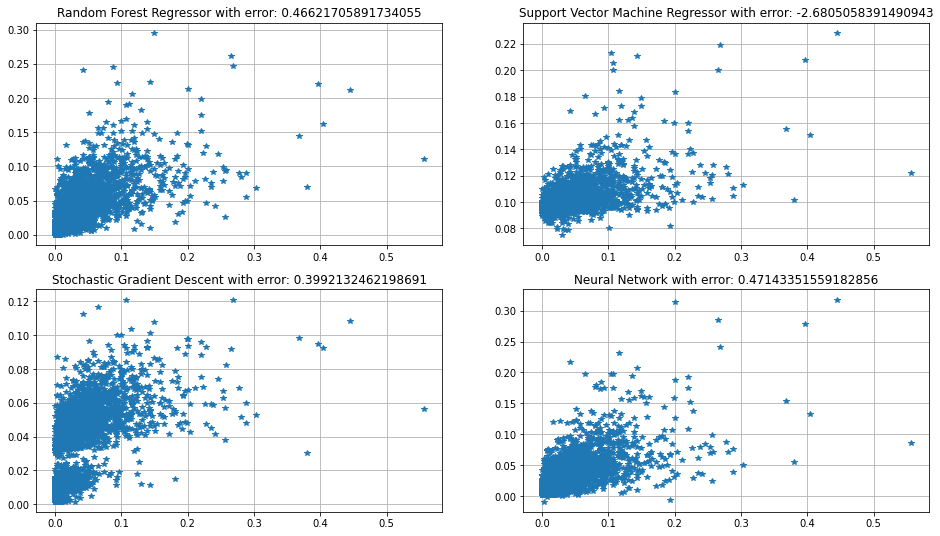

In [62]:
plt.figure(figsize=(16,9))
plt.subplots(figsize=(16,9))

plt.subplot(221)
plt.grid()
plt.plot(y_test, y_test_pred_rf, "*")
plt.title("Random Forest Regressor with error: " + str(metrics.r2_score(y_test, y_test_pred_rf)))

plt.subplot(222)
plt.grid()
plt.plot(y_test, y_test_pred_svm, "*")
plt.title("Support Vector Machine Regressor with error: " + str(metrics.r2_score(y_test, y_test_pred_svm)))

plt.subplot(223)
plt.grid()
plt.plot(y_test, y_test_pred_sgd, "*")
plt.title("Stochastic Gradient Descent with error: " + str(metrics.r2_score(y_test, y_test_pred_sgd)))

plt.subplot(224)
plt.grid()
plt.plot(y_test, y_test_pred_nn, "*")
plt.title("Neural Network with error: " + str(metrics.r2_score(y_test, y_test_pred_nn)))

As can be seen, the best results are for the neural network which gives the highest R2 score.

Also we can test the models on each store and predict the data for the time period ahead of the data on the dataset. For this we just create a function that creates a rolling window of predictions, where the prediction of a month becomes part of the input for the next month in each iteration, and the iterations are for the months we want to predict:

In [82]:
def make_predictions(store, dataset, model, years_lag, months_lag, uses_type, months_ahead=12, *, is_nn=False):
    store_good_data = dataset[store].dropna()
    store_months = store_good_data.index.copy()
    store_vals = list(store_good_data)
    if uses_type:
        store_type_vector = [0]*len(unique_types)
        store_type_vector[unique_types.index(stores_data[store]["type"])] = 1.
    
    last_real_month = store_months[-1]
    num_real_months = len(store_months)
    
    for i in range(len(store_vals),len(store_vals)+months_ahead):
        year_input_vals = list(store_vals[i-years_lag*12:i:12])
        month_input_vals = list(store_vals[i-months_lag:i])
        input_vals = year_input_vals + month_input_vals

        if uses_type:
            input_vals += store_type_vector

        store_months = store_months.union([store_months[-1] + pd.DateOffset(months=1)])
        input_vals = scaler_X.transform([input_vals])
        if is_nn:
            prediction = scaler_y.inverse_transform(model.predict(input_vals, verbose=0))
        else:
            prediction = scaler_y.inverse_transform([model.predict(input_vals)])
        store_vals.append(prediction[0][0])
    
    real_store_months = store_months[:num_real_months]
    predicted_store_months = store_months[num_real_months:]
    real_store_vals = store_vals[:num_real_months]
    predicted_store_vals = store_vals[num_real_months:]

    return (
        real_store_months, predicted_store_months,
        real_store_vals, predicted_store_vals
    )

We also create function just to plot the predictions:

In [85]:
def plot_predictions(
    real_store_months, predicted_store_months, real_store_vals, predicted_store_vals
):
    plt.grid()
    plt.plot(
        [real_store_months[-1]] + list(predicted_store_months),
        [real_store_vals[-1]] + list(predicted_store_vals),
        "-*", color="orange",
        label="Predicted Data"
    )
    plt.plot(real_store_months, real_store_vals, "*-", color="blue", label="Real Data")
    plt.fill_between(real_store_months, real_store_vals, alpha=0.2)
    plt.fill_between(
        [real_store_months[-1]] + list(predicted_store_months),
        [real_store_vals[-1]] + list(predicted_store_vals),
        alpha=0.2
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

Now the functions are evaluated with different stores:

#### Store A0892

Text(0.5, 1.0, 'Neural Network')

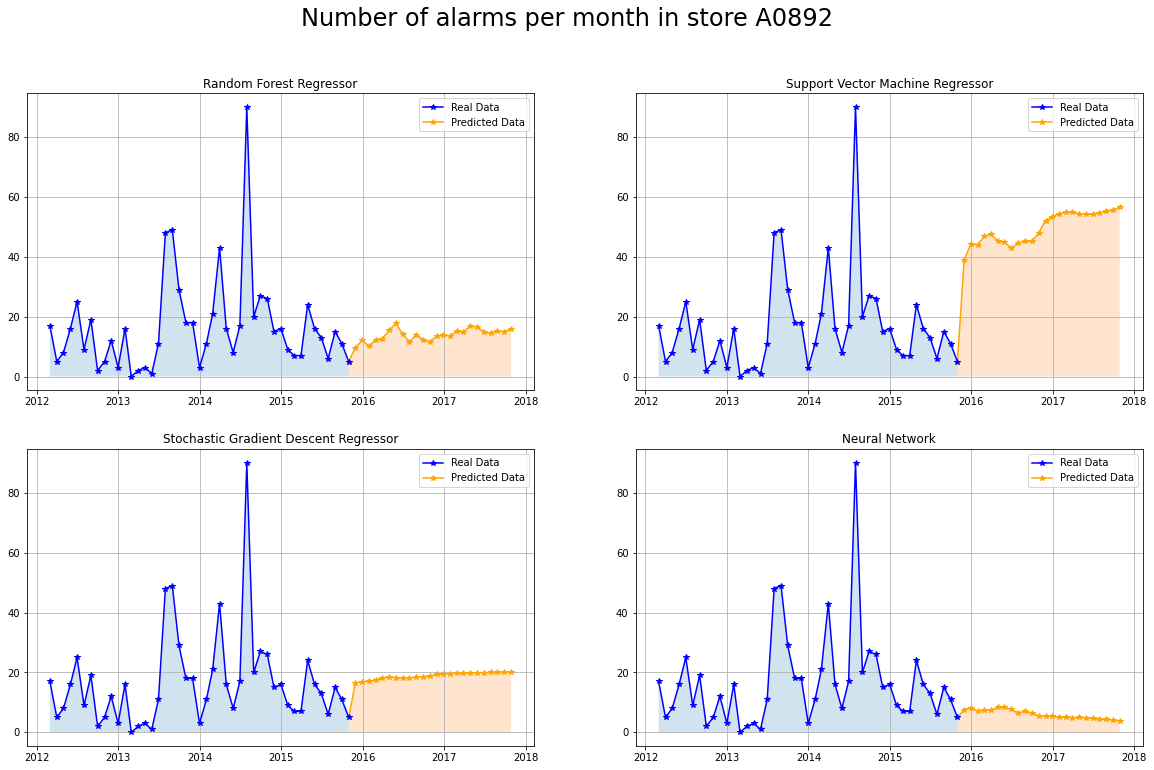

In [93]:
fig, _ = plt.subplots(figsize=(20,12))
fig.suptitle('Number of alarms per month in store A0892', fontsize=24)

plt.subplot(221)
plot_predictions(
    *make_predictions("A0892", dataset, model_rf, years_lag, months_lag, True, 24)
)
plt.title("Random Forest Regressor")

plt.subplot(222)
plot_predictions(
    *make_predictions("A0892", dataset, model_svm, years_lag, months_lag, True, 24)
)
plt.title("Support Vector Machine Regressor")

plt.subplot(223)
plot_predictions(
    *make_predictions("A0892", dataset, model_sgd, years_lag, months_lag, True, 24)
)
plt.title("Stochastic Gradient Descent Regressor")

plt.subplot(224)
plot_predictions(
    *make_predictions("A0892", dataset, model_nn, years_lag, months_lag, True, 24, is_nn=True)
)
plt.title("Neural Network")

#### Store A0416

Text(0.5, 1.0, 'Neural Network')

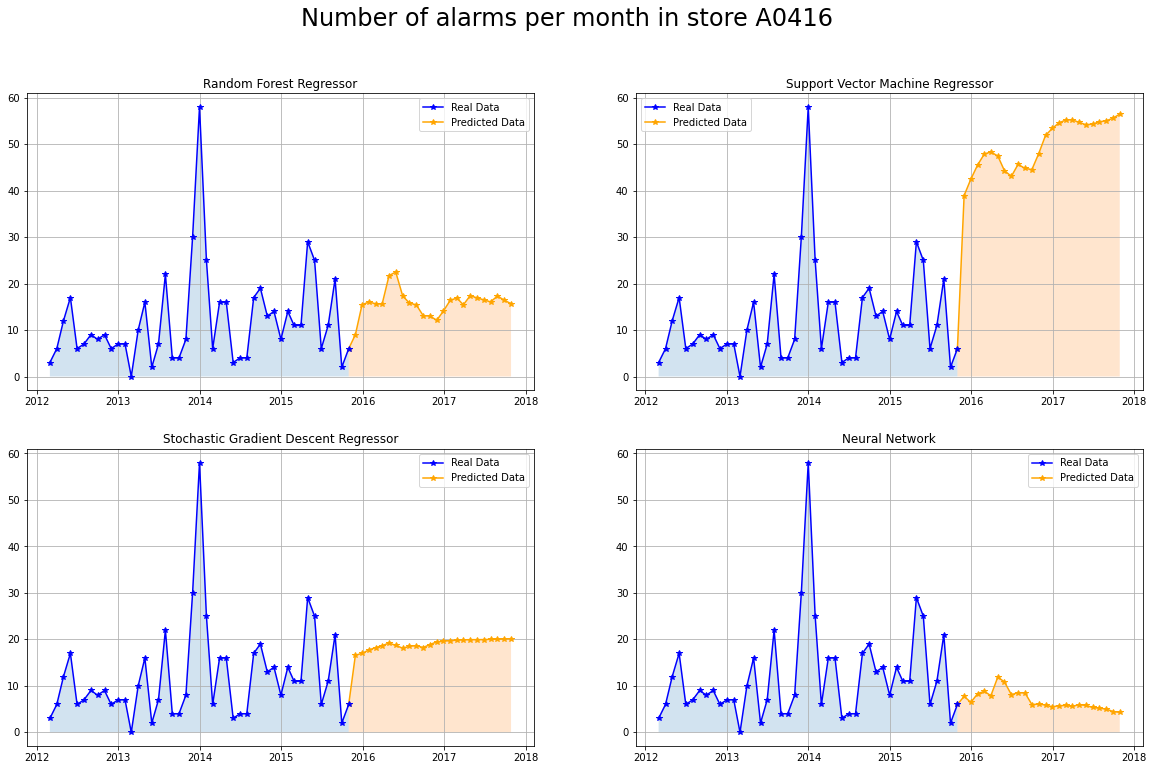

In [95]:
fig, _ = plt.subplots(figsize=(20,12))
fig.suptitle('Number of alarms per month in store A0416', fontsize=24)

plt.subplot(221)
plot_predictions(
    *make_predictions("A0416", dataset, model_rf, years_lag, months_lag, True, 24)
)
plt.title("Random Forest Regressor")

plt.subplot(222)
plot_predictions(
    *make_predictions("A0416", dataset, model_svm, years_lag, months_lag, True, 24)
)
plt.title("Support Vector Machine Regressor")

plt.subplot(223)
plot_predictions(
    *make_predictions("A0416", dataset, model_sgd, years_lag, months_lag, True, 24)
)
plt.title("Stochastic Gradient Descent Regressor")

plt.subplot(224)
plot_predictions(
    *make_predictions("A0416", dataset, model_nn, years_lag, months_lag, True, 24, is_nn=True)
)
plt.title("Neural Network")

#### Store A0003

Text(0.5, 1.0, 'Neural Network')

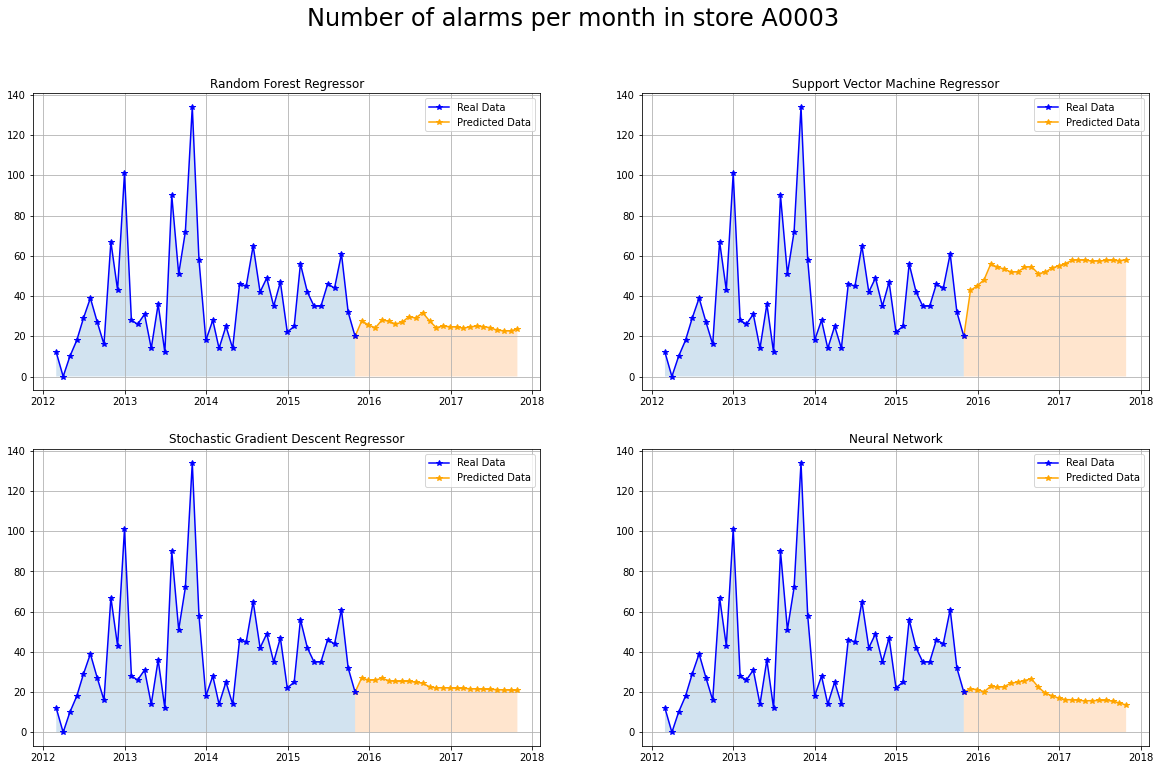

In [97]:
fig, _ = plt.subplots(figsize=(20,12))
fig.suptitle('Number of alarms per month in store A0003', fontsize=24)

plt.subplot(221)
plot_predictions(
    *make_predictions("A0003", dataset, model_rf, years_lag, months_lag, True, 24)
)
plt.title("Random Forest Regressor")

plt.subplot(222)
plot_predictions(
    *make_predictions("A0003", dataset, model_svm, years_lag, months_lag, True, 24)
)
plt.title("Support Vector Machine Regressor")

plt.subplot(223)
plot_predictions(
    *make_predictions("A0003", dataset, model_sgd, years_lag, months_lag, True, 24)
)
plt.title("Stochastic Gradient Descent Regressor")

plt.subplot(224)
plot_predictions(
    *make_predictions("A0003", dataset, model_nn, years_lag, months_lag, True, 24, is_nn=True)
)
plt.title("Neural Network")

#### Store A0683

Text(0.5, 1.0, 'Neural Network')

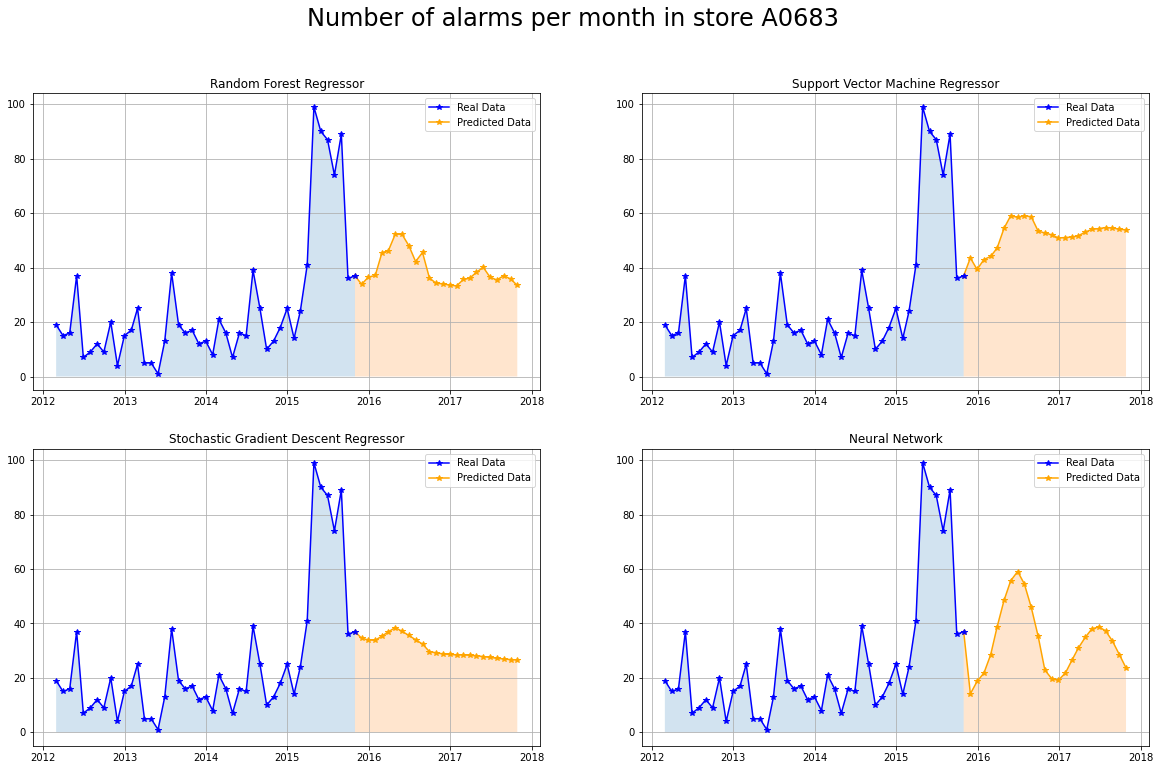

In [98]:
fig, _ = plt.subplots(figsize=(20,12))
fig.suptitle('Number of alarms per month in store A0683', fontsize=24)

plt.subplot(221)
plot_predictions(
    *make_predictions("A0683", dataset, model_rf, years_lag, months_lag, True, 24)
)
plt.title("Random Forest Regressor")

plt.subplot(222)
plot_predictions(
    *make_predictions("A0683", dataset, model_svm, years_lag, months_lag, True, 24)
)
plt.title("Support Vector Machine Regressor")

plt.subplot(223)
plot_predictions(
    *make_predictions("A0683", dataset, model_sgd, years_lag, months_lag, True, 24)
)
plt.title("Stochastic Gradient Descent Regressor")

plt.subplot(224)
plot_predictions(
    *make_predictions("A0683", dataset, model_nn, years_lag, months_lag, True, 24, is_nn=True)
)
plt.title("Neural Network")